In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
BJA = pd.read_csv(
    "https://raw.githubusercontent.com/Ramil-cyber/Research_Linking_Analyzing_Deaths_US_Prisons/refs/heads/main/Data/BJA_updated_fields_Full-Data_data-882_Cleaned-up.2.25.csv"
)
BJA

,Manner of Death,Year of Fiscal Year of Death,Location Type,Concat ID,Masked Count,Gender,Gender (Open Text),Grantee Legal Name,Location of Death,Location of Death-State (postal abbreviation):,...,Data As Of,Data Entry Status,Date of Death,Decedent Last Name,First Name,Ethnicity,Facility Type,Fiscal Year of Death,Flag,Flag Count
0,Suicide,2023,State/Local Law Enforcement,AaronDonleyOK20231935,NaN,Male,NaN,OKLAHOMA DISTRICT ATTORNEYS COUNCIL,Unknown,OK,...,Aug 16 2024,Complete,7/24/2023,Aaron,Donley,"Not of Hispanic, Latino, or Spanish origin",None of the above,1/1/2023 0:00,NaN,NaN
1,Death attributed to use of force by a law enfo...,2023,State/Local Law Enforcement,AbelTylerThomasWI20231981,NaN,Male,NaN,DEPARTMENT OF JUSTICE WISCONSIN,Residence/Home,WI,...,Aug 16 2024,Complete,6/3/2023,Abel,Tyler,"Not of Hispanic, Latino, or Spanish origin",None of the above,1/1/2023 0:00,NaN,NaN
2,Death attributed to use of force by a law enfo...,2023,State/Local Law Enforcement,ABNEYCHACEJOSEPHNE20231987,NaN,Male,NaN,NEBRASKA COMMISSION ON LAW ENFORCEMENT AND CRI...,BRYAN WEST MEDICAL CENTER,NE,...,Aug 16 2024,Complete,5/6/2023,ABNEY,CHACE,"Not of Hispanic, Latino, or Spanish origin",None of the above,1/1/2023 0:00,NaN,NaN
3,Death attributed to use of force by a law enfo...,2023,State/Local Law Enforcement,AcostaAlbertRafaelTX20231993,NaN,Male,NaN,"GOVERNOR, TEXAS OFFICE OF THE",Scene of incident,TX,...,Aug 16 2024,Complete,5/11/2023,Acosta,Albert,"Hispanic, Latino, or Spanish origin",None of the above,1/1/2023 0:00,NaN,NaN
4,Death attributed to use of force by a law enfo...,2023,State/Local Law Enforcement,AcostaNikolasNM20232002,NaN,Male,NaN,"PUBLIC SAFETY, NEW MEXICO DEPARTMENT OF",Residence,NM,...,Aug 16 2024,Complete,1/6/2023,Acosta,Nikolas,"Hispanic, Latino, or Spanish origin",None of the above,1/1/2023 0:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25388,Death attributed to use of force by a law enfo...,2022,State/Local Law Enforcement,McLeodLyndonJCO20211974,NaN,Male,NaN,COLORADO DEPARTMENT OF PUBLIC SAFETY,Lakewood Colorado,CO,...,Aug 16 2024,In Progress,12/27/2021,McLeod,Lyndon,Unknown,None of the above,1/1/2022 0:00,NaN,NaN
25389,Suicide,2022,Jail,Garcia-MartinezDavidCO20221996,NaN,Male,NaN,COLORADO DEPARTMENT OF PUBLIC SAFETY,Adams County Jail,CO,...,Aug 16 2024,In Progress,2/9/2022,Garcia-Martinez,David,Unknown,Municipal or county jail,1/1/2022 0:00,NaN,NaN
25390,Death attributed to use of force by a law enfo...,2022,State/Local Law Enforcement,McGheeJamarianMarquisCO20221992,NaN,Male,NaN,COLORADO DEPARTMENT OF PUBLIC SAFETY,Apartment Complex Parking Lot,CO,...,Aug 16 2024,In Progress,3/3/2022,McGhee,Jamarian,Unknown,None of the above,1/1/2022 0:00,NaN,NaN
25391,Death attributed to use of force by a law enfo...,2022,State/Local Law Enforcement,LainezAnthonyGeovanyCO20221996,NaN,Male,NaN,COLORADO DEPARTMENT OF PUBLIC SAFETY,W Midway Ave / N Sheridan Blvd,CO,...,Aug 16 2024,In Progress,9/29/2022,Lainez,Anthony,Unknown,None of the above,1/1/2022 0:00,NaN,NaN


In [3]:
missing_counts = BJA.isnull().sum()
missing_percent = (missing_counts / len(BJA)) * 100

missing_summary = pd.DataFrame(
    {"Missing Count": missing_counts, "Missing Percentage (%)": missing_percent}
)

print(missing_summary)

                                                    Missing Count  \
Manner of Death                                                 0   
Year of Fiscal Year of Death                                    0   
Location Type                                                   0   
Concat ID                                                       0   
Masked Count                                                25393   
Gender                                                          0   
Gender (Open Text)                                          25367   
Grantee Legal Name                                              0   
Location of Death                                            2619   
Location of Death-State (postal abbreviation):                  0   
Middle Name                                                 12180   
Notes                                                       25393   
Other (Open Text)                                           23716   
PreRecode Type of Death           

In [4]:
# Dropping the columns with missing values
dropped_cols = [
    "Masked Count",
    "Notes",
    "Status - Please use this column to track any updates you can make to these records.",
    "Flag",
    "Flag Count",
    "Gender (Open Text)",
    "Other (Open Text)",
    "Recode",
    "Agency/End Date",
]
BJA.drop(columns=dropped_cols, inplace=True)

In [5]:
BJA.head()

,Manner of Death,Year of Fiscal Year of Death,Location Type,Concat ID,Gender,Grantee Legal Name,Location of Death,Location of Death-State (postal abbreviation):,Middle Name,PreRecode Type of Death,...,Calendar Year Death,City,Data As Of,Data Entry Status,Date of Death,Decedent Last Name,First Name,Ethnicity,Facility Type,Fiscal Year of Death
0,Suicide,2023,State/Local Law Enforcement,AaronDonleyOK20231935,Male,OKLAHOMA DISTRICT ATTORNEYS COUNCIL,Unknown,OK,NaN,ARD,...,2023,Broken Bow,Aug 16 2024,Complete,7/24/2023,Aaron,Donley,"Not of Hispanic, Latino, or Spanish origin",None of the above,1/1/2023 0:00
1,Death attributed to use of force by a law enfo...,2023,State/Local Law Enforcement,AbelTylerThomasWI20231981,Male,DEPARTMENT OF JUSTICE WISCONSIN,Residence/Home,WI,Thomas,ARD,...,2023,Star Prairie,Aug 16 2024,Complete,6/3/2023,Abel,Tyler,"Not of Hispanic, Latino, or Spanish origin",None of the above,1/1/2023 0:00
2,Death attributed to use of force by a law enfo...,2023,State/Local Law Enforcement,ABNEYCHACEJOSEPHNE20231987,Male,NEBRASKA COMMISSION ON LAW ENFORCEMENT AND CRI...,BRYAN WEST MEDICAL CENTER,NE,JOSEPH,ARD,...,2023,LINCOLN,Aug 16 2024,Complete,5/6/2023,ABNEY,CHACE,"Not of Hispanic, Latino, or Spanish origin",None of the above,1/1/2023 0:00
3,Death attributed to use of force by a law enfo...,2023,State/Local Law Enforcement,AcostaAlbertRafaelTX20231993,Male,"GOVERNOR, TEXAS OFFICE OF THE",Scene of incident,TX,Rafael,ARD,...,2023,Cameron,Aug 16 2024,Complete,5/11/2023,Acosta,Albert,"Hispanic, Latino, or Spanish origin",None of the above,1/1/2023 0:00
4,Death attributed to use of force by a law enfo...,2023,State/Local Law Enforcement,AcostaNikolasNM20232002,Male,"PUBLIC SAFETY, NEW MEXICO DEPARTMENT OF",Residence,NM,NaN,ARD,...,2023,Roswell,Aug 16 2024,Complete,1/6/2023,Acosta,Nikolas,"Hispanic, Latino, or Spanish origin",None of the above,1/1/2023 0:00


In [ ]:
#Filling missing values and preprocessing

median_age = BJA["Age"].median()
BJA["Age"].fillna(median_age, inplace=True)
BJA["Agency Name"].fillna("Unknown Agency", inplace=True)
BJA["Decedent Last Name"].fillna("Unknown", inplace=True)
BJA["First Name"].fillna("Unknown", inplace=True)
BJA["City"].fillna("Unknown City", inplace=True)
BJA["Zip Code"].fillna("00000", inplace=True)
BJA["Location of Death"].fillna("Unknown Location", inplace=True)
BJA["Street Address:"].fillna("Unknown Location", inplace=True)
BJA["Location Type"] = BJA["Location Type"].replace({"jail": "Jail"})

### 1.1 Record Count by Year

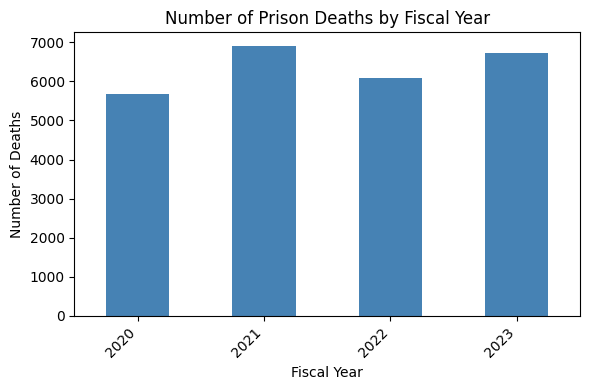

In [28]:
BJA["Fiscal Year of Death"] = pd.to_datetime(BJA["Fiscal Year of Death"])
BJA["Death Year"] = BJA["Fiscal Year of Death"].dt.year

year_counts = BJA["Death Year"].value_counts().sort_index()

plt.figure(figsize=(6, 4))
year_counts.plot(kind="bar", color="steelblue")
plt.title("Number of Prison Deaths by Fiscal Year")
plt.xlabel("Fiscal Year")
plt.ylabel("Number of Deaths")
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

> This shows year‑to‑year jumps or drops in recorded deaths.

### 1.3 Distribution of “Manner of Death”

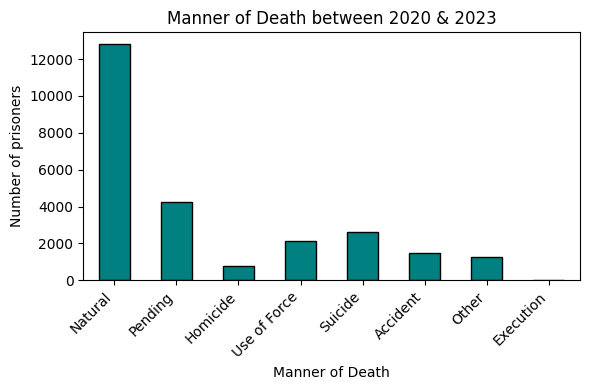

In [ ]:
# Creating a mapping from long “Manner of Death” to short labels:
short_labels = {
    "Natural causes": "Natural",
    "Unavailable, investigation pending": "Pending",
    "Homicide (e.g., an incident between two or more incarcerated individuals resulting in a death)": "Homicide",
    "Death attributed to use of force by a law enforcement or corrections officer": "Use of Force",
    "Suicide": "Suicide",
    "Accident": "Accident",
    "Other": "Other",
    "Execution": "Execution",
}

# Applying the mapping to a new column called 'MannerShort'.
BJA["MannerShort"] = (
    BJA["Manner of Death"].map(short_labels).fillna(BJA["Manner of Death"])
)

# Now re‐computing counts using the short labels:
manner_counts_short = BJA["MannerShort"].value_counts().loc[list(short_labels.values())]

# Ploting with the shorter labels:
plt.figure(figsize=(6, 4))
manner_counts_short.plot(kind="bar", color="teal", edgecolor="black")
plt.title("Manner of Death between 2020 & 2023")
plt.xlabel("Manner of Death")
plt.ylabel("Number of prisoners")

# Rotating x‐labels:
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

> Using bar chart we see which categories (Natural, Accident, Suicide, etc.) dominate.

### 2.1 Gender & Race/Ethnicity

<Figure size 1000x500 with 0 Axes>

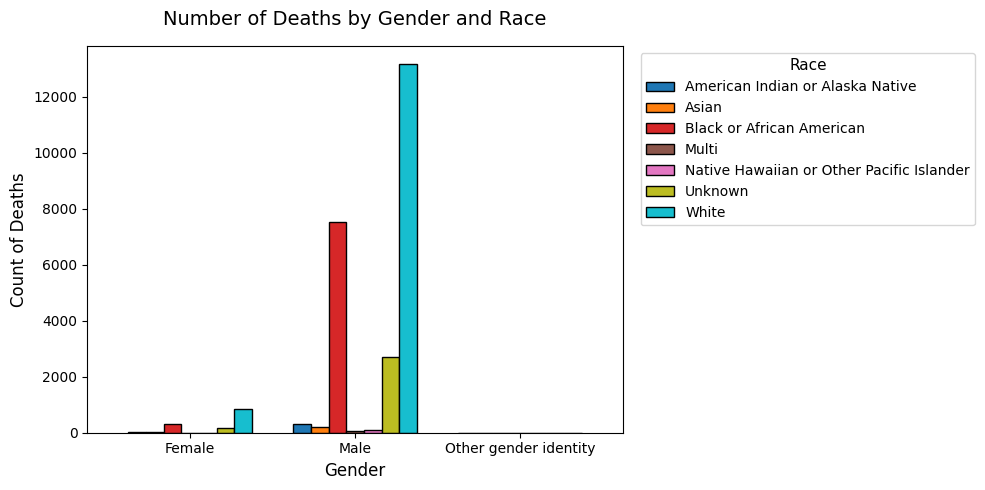

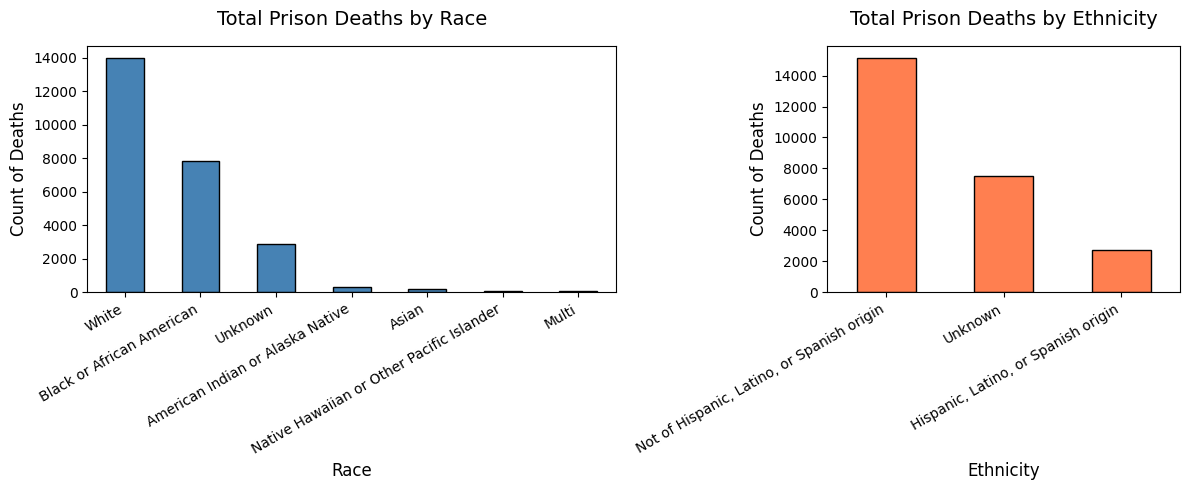

In [ ]:
plt.figure(figsize=(10, 5))  

# Creating a cross‑tab of Gender × Race
gender_race = pd.crosstab(BJA["Gender"], BJA["Race"])

# Ploting the grouped bar chart
ax1 = gender_race.plot(
    kind="bar",
    figsize=(10, 5),
    width=0.75,
    edgecolor="black",
    colormap="tab10",  
)

# Title and axes
ax1.set_title("Number of Deaths by Gender and Race", fontsize=14, pad=15)
ax1.set_xlabel("Gender", fontsize=12)
ax1.set_ylabel("Count of Deaths", fontsize=12)

# Rotating x‑labels
plt.xticks(rotation=0)

# Moving legend outside to the upper right
ax1.legend(
    title="Race",
    bbox_to_anchor=(1.02, 1),  # x, y in axes fraction coordinates (to the right)
    loc="upper left",
    fontsize=10,
    title_fontsize=11,
)

plt.tight_layout()
plt.show()


# Total deaths by Race
race_counts = BJA["Race"].value_counts().sort_values(ascending=False)

# Total deaths by Ethnicity
eth_counts = BJA["Ethnicity"].value_counts().sort_values(ascending=False)

# Createing side‑by‑side subplots
fig, (ax_race, ax_eth) = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 5), gridspec_kw={"width_ratios": [3, 2]}
)

race_counts.plot(kind="bar", ax=ax_race, color="steelblue", edgecolor="black")
ax_race.set_title("Total Prison Deaths by Race", fontsize=14, pad=15)
ax_race.set_xlabel("Race", fontsize=12)
ax_race.set_ylabel("Count of Deaths", fontsize=12)

# Rotating x‑axis labels
ax_race.set_xticklabels(ax_race.get_xticklabels(), rotation=30, ha="right")


eth_counts.plot(kind="bar", ax=ax_eth, color="coral", edgecolor="black")
ax_eth.set_title("Total Prison Deaths by Ethnicity", fontsize=14, pad=15)
ax_eth.set_xlabel("Ethnicity", fontsize=12)
ax_eth.set_ylabel("Count of Deaths", fontsize=12)

# Rotating x‑axis labels
ax_eth.set_xticklabels(ax_eth.get_xticklabels(), rotation=30, ha="right")

plt.tight_layout()
plt.show()

> This shows cross‑tabs and proportions.

### 2.2 Age Distribution & 2.3 Deaths by Location Type

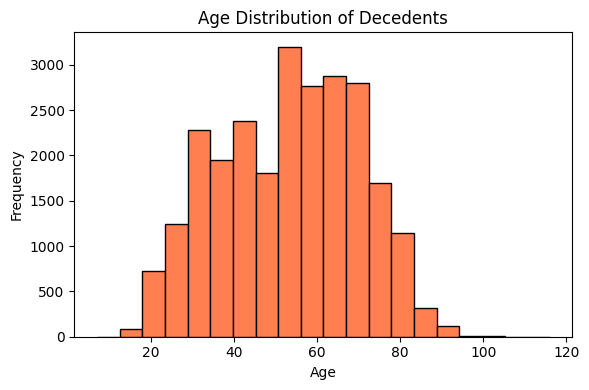

count    25393.000000
mean        53.277084
std         16.637585
min          7.000000
25%         40.000000
50%         55.000000
75%         66.000000
max        116.000000
Name: Age, dtype: float64


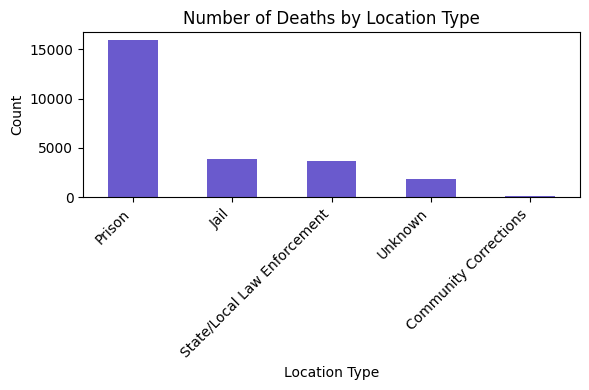

In [23]:
plt.figure(figsize=(6, 4))
BJA["Age"].plot(kind="hist", bins=20, color="coral", edgecolor="black")
plt.title("Age Distribution of Decedents")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Basic statistics
age_stats = BJA["Age"].describe()
print(age_stats)

# Counting deaths by Location Type
loc_type_counts = BJA["Location Type"].value_counts()

plt.figure(figsize=(6, 4))
loc_type_counts.plot(kind="bar", color="slateblue")
plt.title("Number of Deaths by Location Type")
plt.xlabel("Location Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

> Histogram gives overall shape; bar chart shows which system types (state vs. federal vs. local) have the most recorded deaths.

### 3.3 Year‑over‑Year Change

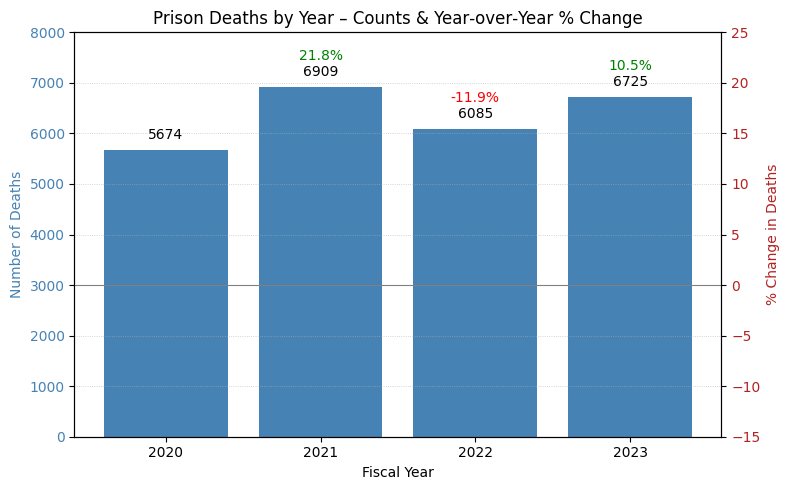

In [24]:
# Recomputing yearly counts & percent change from BJA
BJA["Death Year"] = pd.to_datetime(BJA["Fiscal Year of Death"]).dt.year
year_counts = BJA["Death Year"].value_counts().sort_index()

yearly = year_counts.to_frame(name="Deaths")
yearly["Pct Change"] = yearly["Deaths"].pct_change() * 100

# Preparing x‐positions and labels
years = yearly.index.astype(int).tolist()
x_vals = np.arange(len(years)) 
year_labels = [str(y) for y in years] 

# Creating one figure with dual y‐axes
fig, ax1 = plt.subplots(figsize=(8, 5))

# Ploting Deaths as bars on ax1
bars = ax1.bar(x_vals, yearly["Deaths"], color="steelblue")
ax1.set_xticks(x_vals)
ax1.set_xticklabels(year_labels)
ax1.set_xlabel("Fiscal Year")
ax1.set_ylabel("Number of Deaths", color="steelblue")
ax1.tick_params(axis="y", labelcolor="steelblue")
ax1.set_ylim(0, 8000) 

# Annotating each bar with its Death count
base_offset = 8000 * 0.02 
pct_offset = 8000 * 0.04 

for i, (death_count, pct) in enumerate(zip(yearly["Deaths"], yearly["Pct Change"])):
    # Death count annotation, black, just above the bar
    ax1.text(
        i,
        death_count + base_offset,
        f"{int(death_count)}",
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )

    # Percent Change annotation, colored and placed above the death count
    if not np.isnan(pct):
        pct_color = "green" if pct > 0 else "red"
        ax1.text(
            i,
            death_count + base_offset + pct_offset,
            f"{pct:.1f}%",
            ha="center",
            va="bottom",
            fontsize=10,
            color=pct_color,
        )

# Adding horizontal grid lines on the Deaths axis for readability
ax1.yaxis.grid(True, linestyle=":", linewidth=0.6, alpha=0.7)

# Creating a second y‐axis for % Change
ax2 = ax1.twinx()
ax2.set_ylabel("% Change in Deaths", color="firebrick")
ax2.tick_params(axis="y", labelcolor="firebrick")

# Forcing the % Change axis
ax2.set_ylim(-15, 25)

# Drawing a horizontal line at 0% for reference
ax2.axhline(0, color="gray", linewidth=0.8, linestyle="-")

plt.title("Prison Deaths by Year – Counts & Year‑over‑Year % Change")
fig.tight_layout()
plt.show()

> This highlights any abrupt rises or drops (e.g., COVID‑19 effect).

### 4.2 State‑Level Bar Chart

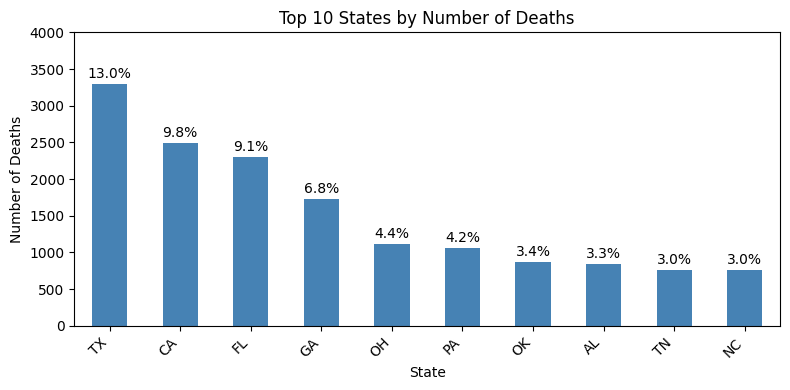

In [ ]:
# Computing counts by state and selecting top 10
state_counts = BJA["Location of Death-State (postal abbreviation):"].value_counts()
top10_states = state_counts.head(10)

# Computing percentages of total deaths for these top 10 states
total_deaths = state_counts.sum()
top10_pct = (top10_states / total_deaths) * 100

# Creating bar chart and annotating each bar with its percentage
fig, ax = plt.subplots(figsize=(8, 4))
bars = top10_states.plot(kind="bar", color="steelblue", ax=ax)

# Adding title and axis labels
ax.set_title("Top 10 States by Number of Deaths")
ax.set_xlabel("State")
ax.set_ylabel("Number of Deaths")

# Seting y‐axis limit up to 4000
ax.set_ylim(0, 4000)

# Rotating x‐labels for readability
plt.xticks(rotation=45, ha="right")

# Annotating each bar with its percentage
offset = 4000 * 0.01  
for i, state in enumerate(top10_states.index):
    count = top10_states[state]
    pct = top10_pct[state]
    ax.text(
        i,  
        count + offset,  
        f"{pct:.1f}%", 
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )

plt.tight_layout()
plt.show()

> Counts deaths by state 

### 6.1 Duplicate Detection

In [25]:
# Checking if “Concat ID” duplicates exist
duplicate_ids = BJA["Concat ID"].duplicated().sum()
print(f"Number of duplicate Concat IDs: {duplicate_ids}")

# Checking composite duplicates by Name + Last Name + Date of Death
composite_dup = BJA.duplicated(
    subset=["First Name", "Decedent Last Name", "Date of Death"]
).sum()
print(f"Number of duplicates by Name + Date of Death: {composite_dup}")

Number of duplicate Concat IDs: 37
Number of duplicates by Name + Date of Death: 63


In [26]:
# Identifying all Concat IDs that occur more than once
dup_ids = BJA.loc[BJA["Concat ID"].duplicated(keep=False), "Concat ID"].unique()

# Showing every row that has one of those duplicate Concat IDs
duplicate_rows = BJA[BJA["Concat ID"].isin(dup_ids)].sort_values("Concat ID")

duplicate_rows

,Manner of Death,Year of Fiscal Year of Death,Location Type,Concat ID,Gender,Grantee Legal Name,Location of Death,Location of Death-State (postal abbreviation):,Middle Name,PreRecode Type of Death,...,Data As Of,Data Entry Status,Date of Death,Decedent Last Name,First Name,Ethnicity,Facility Type,Fiscal Year of Death,Death Year,MannerShort
691,Death attributed to use of force by a law enfo...,2023,State/Local Law Enforcement,NameWithheldUT20229999,Male,EXECUTIVE OFFICE OF THE STATE OF UTAH,"Uintah County Sheriff Department,Bureau of Ind...",UT,NaN,ARD,...,Aug 16 2024,Complete,12/16/2022,Name,Withheld,Unknown,None of the above,2023-01-01,2023,Use of Force
692,Death attributed to use of force by a law enfo...,2023,State/Local Law Enforcement,NameWithheldUT20229999,Male,EXECUTIVE OFFICE OF THE STATE OF UTAH,Orem Police Department,UT,NaN,ARD,...,Aug 16 2024,Complete,12/17/2022,Name,Withheld,Unknown,None of the above,2023-01-01,2023,Use of Force
7913,"Unavailable, investigation pending",2020,Unknown,UNKNOWNUNKNOWNIL20201978,Male,Illinois Criminal Justice Information Authority,STROGER HOSPITAL,IL,NaN,Unknown,...,Aug 16 2024,Complete,4/12/2020,UNKNOWN,UNKNOWN,"Not of Hispanic, Latino, or Spanish origin",None of the above,2020-01-01,2020,Pending
2756,"Unavailable, investigation pending",2020,Unknown,UNKNOWNUNKNOWNIL20201978,Male,Illinois Criminal Justice Information Authority,ST. ANTHONY HOSPITAL,IL,NaN,Unknown,...,Aug 16 2024,Complete,4/19/2020,UNKNOWN,UNKNOWN,"Hispanic, Latino, or Spanish origin",None of the above,2020-01-01,2020,Pending
21802,Suicide,2021,State/Local Law Enforcement,UnknownUnknownIL20219999,Male,Illinois Criminal Justice Information Authority,Unknown Location,IL,NaN,ARD,...,Aug 16 2024,Complete,6/25/2021,Unknown,Unknown,Unknown,None of the above,2021-01-01,2021,Suicide
21767,Accident,2021,State/Local Law Enforcement,UnknownUnknownIL20219999,Male,Illinois Criminal Justice Information Authority,Unknown Location,IL,NaN,ARD,...,Aug 16 2024,Complete,5/30/2021,Unknown,Unknown,Unknown,None of the above,2021-01-01,2021,Accident
22639,Suicide,2022,Jail,UnknownUnknownIL20229999,Male,Illinois Criminal Justice Information Authority,Unknown,IL,NaN,J,...,Aug 16 2024,Complete,3/22/2022,Unknown,Unknown,Unknown,Municipal or county jail,2022-01-01,2022,Suicide
22514,"Unavailable, investigation pending",2022,Jail,UnknownUnknownIL20229999,Male,Illinois Criminal Justice Information Authority,Unknown,IL,NaN,J,...,Aug 16 2024,Complete,8/13/2022,Unknown,Unknown,Unknown,Municipal or county jail,2022-01-01,2022,Pending
12867,Suicide,2022,Jail,UnknownUnknownIL20229999,Male,Illinois Criminal Justice Information Authority,Unknown,IL,NaN,Unknown,...,Aug 16 2024,Complete,7/13/2022,Unknown,Unknown,"Not of Hispanic, Latino, or Spanish origin",None of the above,2022-01-01,2022,Suicide
14961,Suicide,2023,Jail,UnknownUnknownIL20229999,Male,Illinois Criminal Justice Information Authority,Unknown,IL,NaN,J,...,Aug 16 2024,Complete,11/17/2022,Unknown,Unknown,"Not of Hispanic, Latino, or Spanish origin",Municipal or county jail,2023-01-01,2023,Suicide


In [27]:
# Finding every row where Name + Date of Death is duplicated
dup_name_date_rows = BJA[
    BJA.duplicated(
        subset=["First Name", "Decedent Last Name", "Date of Death"], keep=False
    )
].sort_values(["First Name", "Decedent Last Name", "Date of Death"])

dup_name_date_rows

,Manner of Death,Year of Fiscal Year of Death,Location Type,Concat ID,Gender,Grantee Legal Name,Location of Death,Location of Death-State (postal abbreviation):,Middle Name,PreRecode Type of Death,...,Data As Of,Data Entry Status,Date of Death,Decedent Last Name,First Name,Ethnicity,Facility Type,Fiscal Year of Death,Death Year,MannerShort
14840,Natural causes,2022,Unknown,LeeAlvinCornellMT20221949,Male,MONTANA BOARD OF CRIME CONTROL,Deer Lodge Medical Center,MT,Cornell,Unknown,...,Aug 16 2024,Complete,6/12/2022,Lee,Alvin,"Not of Hispanic, Latino, or Spanish origin",None of the above,2022-01-01,2022,Natural
22713,Natural causes,2022,Prison,LeeAlvinMT20221949,Male,MONTANA BOARD OF CRIME CONTROL,Montana State Prison,MT,NaN,Other,...,Aug 16 2024,Complete,6/12/2022,Lee,Alvin,Unknown,Other local or state correctional facility (to...,2022-01-01,2022,Natural
12202,Other,2022,Prison,ChandlerAndrewGA20211995,Male,CRIMINAL JUSTICE COORDINATING COUNCIL,Phillips State Prison,GA,NaN,P,...,Aug 16 2024,Complete,10/7/2021,Chandler,Andrew,"Not of Hispanic, Latino, or Spanish origin",State prison,2022-01-01,2022,Other
12206,Other,2022,Prison,ChandlerAndrewBlayneGA20211995,Male,CRIMINAL JUSTICE COORDINATING COUNCIL,Phillips State Prison,GA,Blayne,P,...,Aug 16 2024,Complete,10/7/2021,Chandler,Andrew,"Not of Hispanic, Latino, or Spanish origin",State prison,2022-01-01,2022,Other
12568,Suicide,2022,Jail,CollierAugustusMO20221992,Male,DEPARTMENT OF PUBLIC SAFETY MISSOURI,St. Louis City Justice Center,MO,NaN,J,...,Aug 16 2024,Complete,7/8/2022,Collier,Augustus,"Not of Hispanic, Latino, or Spanish origin",Municipal or county jail,2022-01-01,2022,Suicide
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23182,Natural causes,2022,Prison,BarbeeWilliamHarrisonIA20221966,Male,DEPT OF PUB SAFETY,Fort Dodge Correctional Facility,IA,Harrison,P,...,Aug 16 2024,Complete,7/16/2022,Barbee,William,Unknown,State prison,2022-01-01,2022,Natural
21512,Other,2021,Prison,DickersonWilliamCLA20211943,Male,LOUISIANA COMMISSION ON LAW ENFORCEMENT AND AD...,Unknown Location,LA,C,P,...,Aug 16 2024,Complete,4/14/2021,Dickerson,William,Unknown,State prison,2021-01-01,2021,Other
21516,Other,2021,Prison,DickersonWilliamLLA20211943,Male,LOUISIANA COMMISSION ON LAW ENFORCEMENT AND AD...,Louisiana State Penetentiary,LA,L,P,...,Aug 16 2024,Complete,4/14/2021,Dickerson,William,Unknown,State prison,2021-01-01,2021,Other
1146,Suicide,2020,Unknown,unknownunknownIL20191987,Female,Illinois Criminal Justice Information Authority,Madison County Sheriff's Office,IL,NaN,unknown,...,Aug 16 2024,Complete,10/29/2019,unknown,unknown,"Not of Hispanic, Latino, or Spanish origin",None of the above,2020-01-01,2020,Suicide
